# Introduction

In this project,we design a CNN model to claasify the object in an image

# Importing Modules

In [23]:
import numpy as np
import random
import cv2
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Convolution2D,MaxPooling2D,Input,Activation,Flatten,Dropout,Dense,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils#for converting test files into binary forms 
import matplotlib.pyplot as plt
%matplotlib inline
#mnist contains dataset of 50,000 32x32 color images of the 10 differnt objects, along with a test set of 10,000 images.


# Training the BenchMark Model

In [24]:
import numpy as np


class Svm (object):
    """" Svm classifier """

    def __init__ (self, inputDim, outputDim):
        self.W = None
        sigma =0.01
        self.W = sigma * np.random.randn(inputDim,outputDim)
        
    def calLoss (self, x, y, reg):
        loss = 0.0
        dW = np.zeros_like(self.W)
        s = x.dot(self.W)
        s_yi = s[np.arange(x.shape[0]),y]
        delta = s- s_yi[:,np.newaxis]+1
        loss_i = np.maximum(0,delta)
        loss_i[np.arange(x.shape[0]),y]=0
        loss = np.sum(loss_i)/x.shape[0]
        loss += reg*np.sum(self.W*self.W)
        ds = np.zeros_like(delta)
        ds[delta > 0] = 1
        ds[np.arange(x.shape[0]),y] = 0
        ds[np.arange(x.shape[0]),y] = -np.sum(ds, axis=1)
        dW = (1/x.shape[0]) * (x.T).dot(ds)
        dW = dW + (2* reg* self.W)
        return loss, dW

    def train (self, x, y, lr=1e-3, reg=1e-5, iter=100, batchSize=200, verbose=False):
        # Run stochastic gradient descent to optimize W.
        lossHistory = []
        for i in range(iter):
            xBatch = None
            num_train = np.random.choice(x.shape[0], batchSize)
            xBatch = x[num_train]
            yBatch = y[num_train]
            loss, dW = self.calLoss(xBatch,yBatch,reg)
            self.W= self.W - lr * dW
            if verbose and i % 100 == 0 and len(lossHistory) is not 0:
                print ('Loop {0} loss {1}'.format(i, lossHistory[i]))

        return lossHistory

    def predict (self, x,):
        yPred = np.zeros(x.shape[0])
        s = x.dot(self.W)
        yPred = np.argmax(s, axis=1)
        return yPred


    def calAccuracy (self, x, y):
        acc = 0
        yPred = self.predict(x)
        acc = np.mean(y == yPred)*100
        return acc


In [25]:
import os
import time
import numpy as np
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)
#Preprocessing
meanImage = np.mean(xTrain, axis=0)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

# Reshape data from channel to rows
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1))
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))

# Add bias dimension columns
xTrain = np.hstack([xTrain, np.ones((xTrain.shape[0], 1))])
xVal = np.hstack([xVal, np.ones((xVal.shape[0], 1))])
xTest = np.hstack([xTest, np.ones((xTest.shape[0], 1))])
numClasses = np.max(yTrain) + 1

print ('Start training Svm classifier')
classifier = Svm(xTrain.shape[1], numClasses)
classifier.train(xTrain, yTrain, lr=1e-7, reg=5e4, iter=1500 ,verbose=True)
print ('Training acc:   {0}%'.format(classifier.calAccuracy(xTrain, yTrain)))
print ('Validating acc: {0}%'.format(classifier.calAccuracy(xVal, yVal)))
print ('Testing acc:    {0}%'.format(classifier.calAccuracy(xTest, yTest)))


Start training Svm classifier
Training acc:   35.00816326530612%
Validating acc: 36.8%
Testing acc:    34.72%


In [29]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
noc=10
classes=['airplane' ,'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Observing and visualizing the Data
 It is very imprtant to understand and visualize the dataset for processing the data.We here observe the number of samples in training and testing data.Other important observation size(number of pixels) of the image.

Number of samples in training set : 50000
Number of samples in testing set : 10000
Size of image in pixels : 32*32


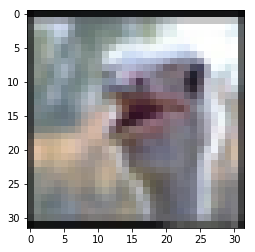

In [30]:
#observations
print("Number of samples in training set : "+str(X_train.shape[0]))
print("Number of samples in testing set : "+str(X_test.shape[0]))
print("Size of image in pixels : "+str(X_train.shape[1])+'*'+str(X_test.shape[2]))
#Visualizations
#plt.imshow(random.choice(X_train))#gives some yellow colored 
img=random.choice(X_train)
plt.imshow(img)

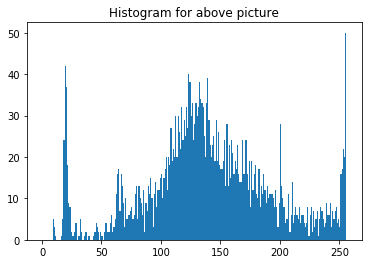

In [31]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram for above picture')
plt.show()

# Preprocessing Data
keras is a high level api built on tensorflow.Tensorflow represent image in 3-D uint8 tensors of shape where first represent height(number of rows),second represents width(number of cols) and the latter is number of channels.

In [32]:
X_train = X_train.reshape(X_train.shape[0],32,32, 3)
X_test = X_test.reshape(X_test.shape[0], 32,32, 3)
input_shape =np.shape(X_train)[1:]
print("The data is reshaped to the respective format!" , input_shape)

The data is reshaped to the respective format! (32, 32, 3)


As our target labels are in the form of classes we need to convert into binary so our model can evaluate it by mapping.In order to acheive that we need to run th following code

In [33]:
print(y_train[0])
modified_y_train=np_utils.to_categorical(y_train,noc)#I got to know tthis function in deep learning project
modified_y_test=np_utils.to_categorical(y_test,noc)
print(modified_y_train[0])

[6]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


cifar10 dataset has colored images  where the color channel ranges from 0 to 255.In order to reduce computational difficulty we divide each pixel by 255.

In [34]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

# Building the architecture

In [20]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(noc, activation='softmax'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

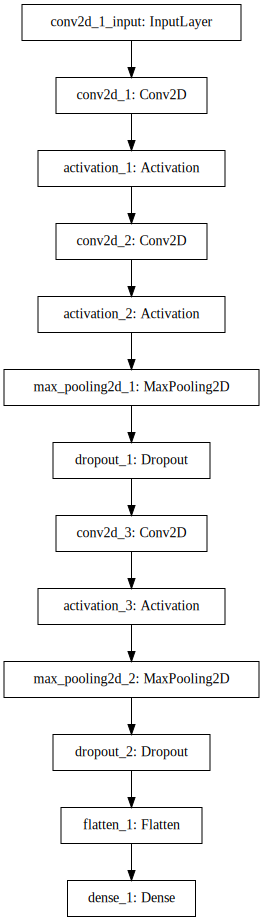

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [24]:

x=model.fit(X_train, modified_y_train, batch_size=128, epochs=10,verbose=1,validation_data=(X_test, modified_y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 407us/step - loss: 2.1903 - acc: 0.1862 - val_loss: 2.0126 - val_acc: 0.2919
Epoch 2/10
50000/50000 [==============================] - 16s 328us/step - loss: 1.9712 - acc: 0.2950 - val_loss: 1.9143 - val_acc: 0.3285
Epoch 3/10
50000/50000 [==============================] - 16s 328us/step - loss: 1.8831 - acc: 0.3327 - val_loss: 1.8276 - val_acc: 0.3477
Epoch 4/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.7919 - acc: 0.3668 - val_loss: 1.7260 - val_acc: 0.3964
Epoch 5/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.7053 - acc: 0.3950 - val_loss: 1.6223 - val_acc: 0.4312
Epoch 6/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.6356 - acc: 0.4197 - val_loss: 1.5736 - val_acc: 0.4447
Epoch 7/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.5816 - acc: 0.4360 - val_loss: 1.

In [25]:
#function to plot model accuracy and loss
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

Test Loss Value: 1.44227503204
Test Accuracy Value: 0.4926


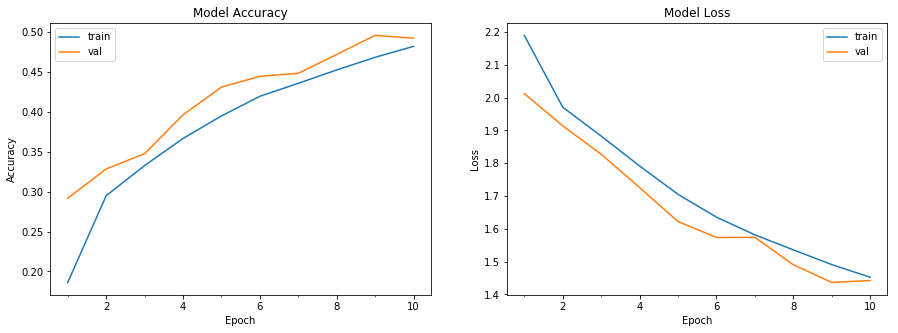

In [26]:
score = model.evaluate(X_test, modified_y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])
plot_model_history(x)

# Add Data Augmentation

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=True)


In [37]:
new_model = Sequential()
new_model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=input_shape))
new_model.add(Activation('relu'))
new_model.add(Convolution2D(48, 3, 3))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.25))
new_model.add(Convolution2D(96, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))
new_model.add(Convolution2D(96, 3, 3))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.25))
new_model.add(Convolution2D(192, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))
new_model.add(Convolution2D(192, 3, 3))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Dropout(0.25))
new_model.add(Flatten())
new_model.add(Dense(512))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(256))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(noc, activation='softmax'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [38]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
y=new_model.fit(X_train, modified_y_train, 
                       batch_size=128, nb_epoch=25, 
                       validation_data = (X_test, modified_y_test), 
                       verbose=1)


/opt/conda/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 31s 612us/step - loss: 1.9303 - acc: 0.2552 - val_loss: 1.5191 - val_acc: 0.4478
Epoch 2/25
50000/50000 [==============================] - 26s 527us/step - loss: 1.4111 - acc: 0.4841 - val_loss: 1.1890 - val_acc: 0.5680
Epoch 3/25
50000/50000 [==============================] - 26s 528us/step - loss: 1.1835 - acc: 0.5783 - val_loss: 1.0169 - val_acc: 0.6419
Epoch 4/25
50000/50000 [==============================] - 26s 529us/step - loss: 1.0336 - acc: 0.6391 - val_loss: 0.9256 - val_acc: 0.6770
Epoch 5/25
50000/50000 [==============================] - 26s 530us/step - loss: 0.9395 - acc: 0.6766 - val_loss: 0.8298 - val_acc: 0.7070
Epoch 6/25
50000/50000 [==============================] - 27s 530us/step - loss: 0.8506 - acc: 0.7075 - val_loss: 0.7929 - val_acc: 0.7238
Epoch 7/25
50000/50000 [==============================] - 26s 530us/step - loss: 0.8051 - acc: 0.7256 - val_loss: 0.

Test Loss Value: 0.626406926632
Test Accuracy Value: 0.8017


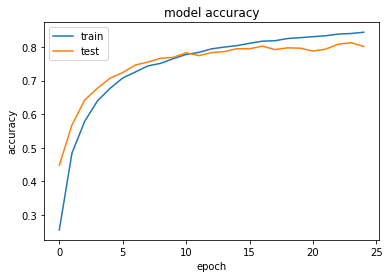

In [40]:
score = new_model.evaluate(X_test, modified_y_test, verbose=0)
print('Test Loss Value:', score[0])
print('Test Accuracy Value:', score[1])
#plot_model_history(y)
plt.plot(y.history['acc'])
plt.plot(y.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
import os, os.path

imgs = []
path = "images/"
count=0
for f in os.listdir(path):
    imgs.append(cv2.imread(os.path.join(path,f)))
    count+=1
print("Successfully loaded {} images".format(count))

Successfully loaded 9 images


In [34]:
pred = []
import tensorflow as tf
for img in imgs:
    # Convert the color image to rgb
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Invert black and white color(since in opencv white is considered 255 and black 0 but we need vice versa in order to match with the dataset)
    #nvert_gray = (255-gray)
    # Resize the image to 28,28 pixels as per the mnist dataset format
    resized = cv2.resize(img,(32,32))

    # Convert the image format from (28,28) to (28,28,1) in order for the model to recognize
    resized = np.asarray(resized)
    #tf.image.grayscale_to_rgb(img,name=None)
    resized=resized.astype('float32')/255
    
    
    pred.append(resized)
    
pred = np.asarray(pred)
print(pred.shape)

(9, 32, 32, 3)


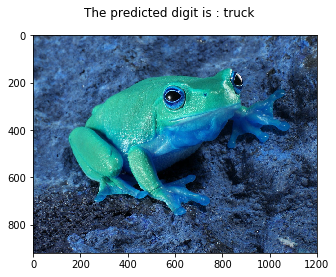

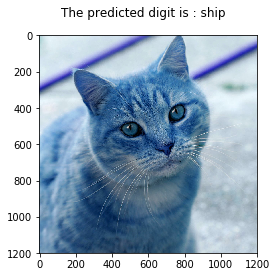

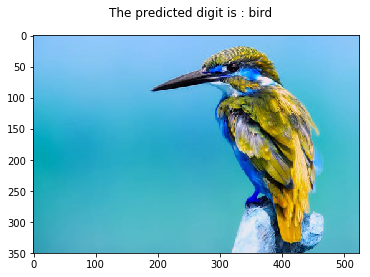

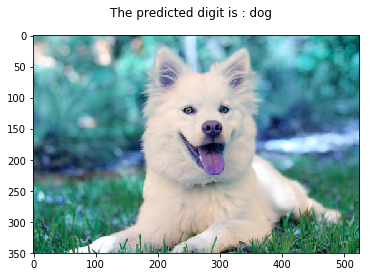

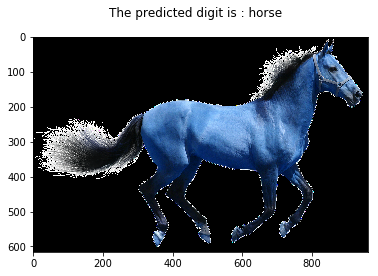

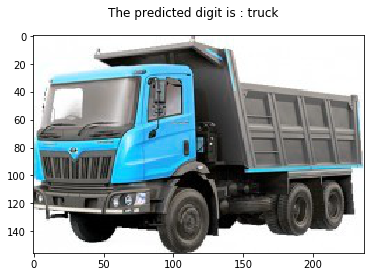

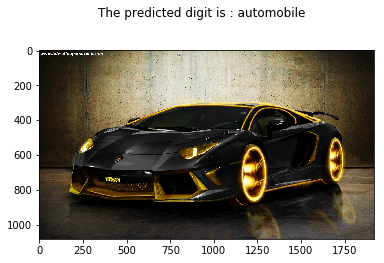

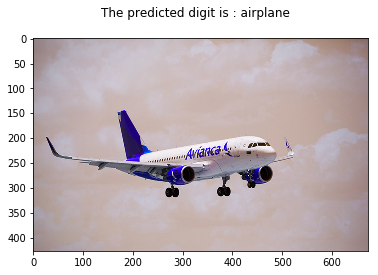

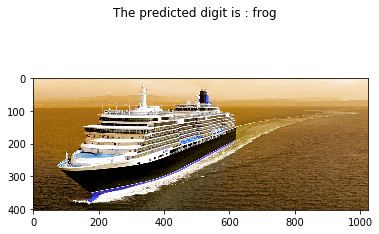

In [39]:
proba = new_model.predict(pred)
# Convert the predicted output to respective integer number
res=proba.argmax(axis=-1)

#plot the image and the predicted number
i=0
for img in imgs:
    plt.figure()
    plt.imshow(img)
    plt.suptitle("The predicted digit is : " + str(classes[res[i]]))
    i+=1

In [ ]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
base_model = InceptionV3(weights='imagenet', include_top=True)

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
import scipy
from scipy import misc
import os
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))
print('model loaded')

# obtain bottleneck features (train)
if os.path.exists('inception_features_train.npz'):
    print('bottleneck features detected (train)')
    features = np.load('inception_features_train.npz')['features']
else:
    print('bottleneck features file not detected (train)')
    print('calculating now ...')
    # pre-process the train data
    big_x_train = np.array([scipy.misc.imresize(X_train[i], (139, 139, 3)) 
                            for i in range(0, len(X_train))]).astype('float32')
    inception_input_train = preprocess_input(big_x_train)
    print('train data preprocessed')
    # extract, process, and save bottleneck features
    features = model.predict(inception_input_train)
    features = np.squeeze(features)
    np.savez('inception_features_train', features=features)
print('bottleneck features saved (train)')

87916544/87910968 [==============================] - 3s 0us/step
model loaded
bottleneck features file not detected (train)
calculating now ...
train data preprocessed
